In [171]:
#Importing all the necessary libraries.
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import time
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model


I'll start by opening the site im going to use to do all the scraping.

In [26]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.maximize_window()
url='https://www.futhead.com/'
driver.get(url)

In [3]:
#Creating necessary lists to save all the stats

playerNames=[]
cardRating=[]
cardPosition=[]
#OVERALL
cardPace=[]
cardShot=[]
cardPassing=[]
cardDribbling=[]
cardDef=[]
cardPhy=[]
#FIELD PLAYERS
#PACE
playerAcceleration=[]
playerSpringSpeed=[]
#SHOOTING
playerPositioning=[]
playerFinishing=[]
playerShotPower=[]
playerLongShots=[]
playerVolleys=[]
playerPenalties=[]
#PASSING
playerVision=[]
playerCrossing=[]
playerFreeKick=[]
playerShortPassing=[]
playerLongPassing=[]
playerCurve=[]
#DRIBBLING
playerAgility=[]
playerBalance=[]
playerReactions=[]
playerBallControll=[]
playerDribbling=[]
playerComposure=[]
#DEFENCE
playerInterception=[]
playerHeading=[]
playerDefAwareness=[]
playerStandingTackle=[]
playerSlidingTackle=[]
#PYHSICAL
playerJumping=[]
playerStamina=[]
playerStrength=[]
playerAgression=[]

The following "appendNans" function is used in order to keep all the lists at the same length and in sync.
If called, it will append NaNs to all the included lists.

In [4]:

def appendNans():
    #OVERALL
    cardPace.append(np.nan)
    cardShot.append(np.nan)
    cardPassing.append(np.nan)
    cardDribbling.append(np.nan)
    cardDef.append(np.nan)
    cardPhy.append(np.nan)
    #PACE
    playerAcceleration.append(np.nan)
    playerSpringSpeed.append(np.nan)
    #SHOOTING
    playerPositioning.append(np.nan)
    playerFinishing.append(np.nan)
    playerShotPower.append(np.nan)
    playerLongShots.append(np.nan)
    playerVolleys.append(np.nan)
    playerPenalties.append(np.nan)
    #PASSING
    playerVision.append(np.nan)
    playerCrossing.append(np.nan)
    playerFreeKick.append(np.nan)
    playerShortPassing.append(np.nan)
    playerLongPassing.append(np.nan)
    playerCurve.append(np.nan)
    #DRIBBLING
    playerAgility.append(np.nan)
    playerBalance.append(np.nan)
    playerReactions.append(np.nan)
    playerBallControll.append(np.nan)
    playerDribbling.append(np.nan)
    playerComposure.append(np.nan)
    #DEFENCE
    playerInterception.append(np.nan)
    playerHeading.append(np.nan)
    playerDefAwareness.append(np.nan)
    playerStandingTackle.append(np.nan)
    playerSlidingTackle.append(np.nan)
    #PYHSICAL
    playerJumping.append(np.nan)
    playerStamina.append(np.nan)
    playerStrength.append(np.nan)
    playerAgression.append(np.nan)
    

The following "collectStats" function is the main function used to collect player stats, if a problematic player appears, returns 1 otherwise returns 0.
it returns an integer in order to keep track of how many problematic players I have encountered.
First we need to check the players position, since we are only focused on out field players,
players whos position is goal keeper will be skipped.
Also if there is a player with a problematic page, this functions calls the appendNans function.

In [5]:

def collectStats(name):
    position=driver.find_element(By.CLASS_NAME,'playercard-position')
    if(position=='GK'):
        return 0
    else:
        playerCard=driver.find_elements(By.CLASS_NAME,'playercard-attr')
        playerNames.append(name)
        cardPosition.append(position.text)
        cardRating.append(driver.find_element(By.CLASS_NAME,'playercard-rating').text)
        try:
            statsTable=driver.find_elements(By.CLASS_NAME,'player-stat-group')[1]
        except:
            appendNans()
            print("Problem with "+name)
            return 1
        #OVERALL
        cardPace.append(playerCard[0].find_element(By.CLASS_NAME,'chembot-value').text)
        cardShot.append(playerCard[1].find_element(By.CLASS_NAME,'chembot-value').text)
        cardPassing.append(playerCard[2].find_element(By.CLASS_NAME,'chembot-value').text)
        cardDribbling.append(playerCard[3].find_element(By.CLASS_NAME,'chembot-value').text)
        cardDef.append(playerCard[4].find_element(By.CLASS_NAME,'chembot-value').text)
        cardPhy.append(playerCard[5].find_element(By.CLASS_NAME,'chembot-value').text)  
        eachStat=statsTable.find_elements(By.CLASS_NAME,'player-stat-value')
        #PACE
        playerAcceleration.append(eachStat[0].text)
        playerSpringSpeed.append(eachStat[1].text)
        #SHOOTING
        playerPositioning.append(eachStat[2].text)
        playerFinishing.append(eachStat[3].text)
        playerShotPower.append(eachStat[4].text)
        playerLongShots.append(eachStat[5].text)
        playerVolleys.append(eachStat[6].text)
        playerPenalties.append(eachStat[7].text)
        #PASSING
        playerVision.append(eachStat[8].text)
        playerCrossing.append(eachStat[9].text)
        playerFreeKick.append(eachStat[10].text)
        playerShortPassing.append(eachStat[11].text)
        playerLongPassing.append(eachStat[12].text)
        playerCurve.append(eachStat[13].text)
        #DRIBBLING
        playerAgility.append(eachStat[14].text)
        playerBalance.append(eachStat[15].text)
        playerReactions.append(eachStat[16].text)
        playerBallControll.append(eachStat[17].text)
        playerDribbling.append(eachStat[18].text)
        playerComposure.append(eachStat[19].text)
        #DEFENCE
        playerInterception.append(eachStat[20].text)
        playerHeading.append(eachStat[21].text)
        playerDefAwareness.append(eachStat[22].text)
        playerStandingTackle.append(eachStat[23].text)
        playerSlidingTackle.append(eachStat[24].text)
        #PYHSICAL
        playerJumping.append(eachStat[25].text)
        playerStamina.append(eachStat[26].text)
        playerStrength.append(eachStat[27].text)
        playerAgression.append(eachStat[28].text)
    return 0    

Once the front page is loaded, find the players page to collect all players stats.

In [6]:
playersPage=driver.find_element(By.LINK_TEXT,'PLAYERS')
playersPage.click()

The following code block is where most of the scrapping happens, i'll start by setting a limit of 88 pages of players, with each page containing 45 players that should be more than enough data.
There are added measures to ensure
the site wont notice i'm a bot and kick me out, such as extra sleep timers, also for my convenience
im printing at the end of each page how many problematic players i've encountered thus far.

In [27]:
count=0
for page in range(88):
    eachPlayer=driver.find_elements(By.CLASS_NAME,'player-name')
    for player in range(0,len(eachPlayer)):
        time.sleep(5)
        eachPlayer=driver.find_elements(By.CLASS_NAME,'player-name')
        name=eachPlayer[player].text
        try:
            eachPlayer[player].click()
        except:
            count+=1
            continue
        time.sleep(5)
        count=count+collectStats(name)
        driver.back()
    print ("finished scrapping page "+str(page+1))
    print("Number of problematic players is --------- "+str(count))
    nextPage=driver.find_element(By.XPATH,'/html/body/div[3]/div[3]/div[1]/div[1]/ul/li[51]/div/a[3]/span').click()
print ("finished everything, number of problematic players is ----- "+str(count))

Problem with Ruben Loftus-Cheek
Problem with Andros Townsend
Problem with Keidi Bare
Problem with Manor Solomon
Problem with Magomed Ozdoev
Problem with Baptiste Santamaria
Problem with Matheus Pereira
Problem with Boubakary Soumaré
Problem with Maxi Moralez
Problem with Enock Mwepu
Problem with Danilo Cataldi
Problem with Shoya Nakajima
Problem with Ross Barkley
Problem with Álvaro García
Problem with Evander
Problem with Renato Steffen
Problem with Gonzalo Escalante
Problem with Radja Nainggolan
Problem with Harry Winks
Problem with Harry Wilson
Problem with Florent Mollet
Problem with Marc Roca
Problem with Thiago Mendes
Problem with Jeffrey Schlupp
Problem with Morgan Sanson
Problem with Lee Jae Sung
Problem with Nicolás Domínguez
Problem with Roberto Gagliardini
Problem with Youcef Belaïli
Problem with Xavier Mercier
Problem with Luciano Acosta
Problem with Tonny Vilhena
Problem with Daniele Rugani
Problem with Mauricio Isla
Problem with Ghislain Konan
Problem with Mattia De Scigl

Problem with Enzo Le Fée
Problem with Dorukhan Toköz
Problem with Alexandru Maxim
Problem with Laurent Abergel
Problem with Anthony Losilla
Problem with Jean-Eudes Aholou
Problem with Sebastián Rodríguez
Problem with Lukáš Provod
Problem with Franco Cristaldo
Problem with Marcelo Díaz
Problem with Guus Til
Problem with Okay Yokuşlu
Problem with Iván Alejo
Problem with Maximilian Eggestein
Problem with Luiz Gustavo
Problem with Teddy Teuma
Problem with Pierre Lees-Melou
Problem with Yimmi Chará
Problem with Amin Younes
Problem with Jean-Daniel Akpa Akpro
Problem with Marvelous Nakamba
Problem with Francisco Pizzini
Problem with Daniel Caligiuri
finished scrapping page 79
Number of problematic players is --------- 310
Problem with Leonel Miranda
Problem with Vadis Odjidja-Ofoe
Problem with Nicola Sansone
Problem with André Gomes
Problem with Emiliano Vecchio
Problem with Jimmy Cabot
Problem with Jean-Paul Boëtius
Problem with Uroš Račić
Problem with Marc Albrighton
Problem with Rubén Pér

Problem with Dany Mota
finished scrapping page 85
Number of problematic players is --------- 574
Problem with Cristian Arango
Problem with Christian Bassogog
Problem with Wesley
Problem with Yann Karamoh
Problem with Yony González
Problem with Lucas Pratto
Problem with Philipp Hofmann
Problem with Dante Vanzeir
Problem with Nemanja Radonjić
Problem with Dimitrios Pelkas
Problem with Alexis Claude-Maurice
Problem with Imrân Louza
Problem with Sean Longstaff
Problem with Gonzalo Villar
Problem with Richard Ortiz
Problem with Stefan Schwab
Problem with Ki Sung Yueng
Problem with Genki Haraguchi
Problem with Guridi
Problem with Pierrick Capelle
Problem with Adam Maher
Problem with Chris Führich
Problem with Morten Thorsby
Problem with Jonathan Osorio
Problem with Salvi Sánchez
Problem with Nampalys Mendy
Problem with Dodi Lukébakio
Problem with Jens Jønsson
Problem with Miguel Crespo
Problem with Juan Ramírez
Problem with Ryota Morioka
Problem with Rodrigo Battaglia
Problem with Mathias Je

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=109.0.5414.120)
Stacktrace:
Backtrace:
	(No symbol) [0x01226643]
	(No symbol) [0x011BBE21]
	(No symbol) [0x010BDA9D]
	(No symbol) [0x0109EF6A]
	(No symbol) [0x01113AAB]
	(No symbol) [0x011261B6]
	(No symbol) [0x0110FB76]
	(No symbol) [0x010E49C1]
	(No symbol) [0x010E5E5D]
	GetHandleVerifier [0x0149A142+2497106]
	GetHandleVerifier [0x014C85D3+2686691]
	GetHandleVerifier [0x014CBB9C+2700460]
	GetHandleVerifier [0x012D3B10+635936]
	(No symbol) [0x011C4A1F]
	(No symbol) [0x011CA418]
	(No symbol) [0x011CA505]
	(No symbol) [0x011D508B]
	BaseThreadInitThunk [0x75A200F9+25]
	RtlGetAppContainerNamedObjectPath [0x77887BBE+286]
	RtlGetAppContainerNamedObjectPath [0x77887B8E+238]


In [28]:
#Creating my data frame from givven lists after finishing scrapping everything.
df=pd.DataFrame()
#CARD STATS
df['name']=playerNames
df['rating']=cardRating
df['position']=cardPosition
df['overall_pace']=cardPace
df['overall_shoot']=cardShot
df['overall_passing']=cardPassing
df['overall_dribbling']=cardDribbling
df['overall_defending']=cardDef
df['overall_physical']=cardPhy
#INNER STATS
#PACE
df['acceleration']=playerAcceleration
df['sprint_speed']=playerSpringSpeed
#SHOOTING
df['finishing']=playerFinishing
df['shot_power']=playerShotPower
df['long_shots']=playerLongShots
df['volleys']=playerVolleys
df['penalties']=playerPenalties
#PASSING
df['vision']=playerVision
df['crossing']=playerCrossing
df['free_kicks']=playerFreeKick
df['short_passing']=playerShortPassing
df['long_passing']=playerLongPassing
df['curve']=playerCurve
#DRIBBLING
df['agility']=playerAgility
df['balance']=playerBalance
df['reactions']=playerReactions
df['ball_controll']=playerBallControll
df['dribbling']=playerDribbling
df['composure']=playerComposure
#DEFENCE
df['interceptions']=playerInterception
df['heading']=playerHeading
df['defensive_awareness']=playerDefAwareness
df['standing_tackle']=playerStandingTackle
df['sliding_tackle']=playerSlidingTackle
#PHYSICAL
df['jumping']=playerJumping
df['stamina']=playerStamina
df['strength']=playerStrength
df['agression']=playerAgression

After creating the data frame i will begin to explore my data to see if / what needs to change in the stats i've collected.

In [29]:
df

,name,rating,position,overall_pace,overall_shoot,overall_passing,overall_dribbling,overall_defending,overall_physical,acceleration,...,composure,interceptions,heading,defensive_awareness,standing_tackle,sliding_tackle,jumping,stamina,strength,agression
0,Lionel Messi,98,RW,93,98,97,99,40,77,99,...,99,47,82,24,41,28,82,84,82,53
1,Pelé,98,CAM,95,96,93,96,60,76,95,...,98,67,94,55,53,49,88,86,76,59
2,Kevin De Bruyne,97,CM,85,94,98,94,81,86,87,...,96,84,70,86,82,67,70,98,83,84
3,Karim Benzema,97,CF,92,97,90,94,45,90,91,...,97,45,99,50,28,21,91,95,95,73
4,Kylian Mbappé,97,ST,99,96,88,98,44,87,99,...,94,46,88,32,42,39,88,99,87,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,Nicola Zalewski,74,LM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3997,Cristian Pellerano,74,CDM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3998,Lasse Schøne,74,CM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3999,Ivan Schranz,74,RM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df.shape

(4001, 37)

Lets save the initial data frame

In [ ]:
df.to_csv('fifa_23_futhead.csv', index=False)

As we can see, before cleaning the initial data frame we have 4001 rows and 37 columns, meaning we have 148,037 cells of data to work with.
Lets see what we can learn about each column from our table.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 3231 non-null   object
 1   rating               3231 non-null   object
 2   position             3231 non-null   object
 3   overall_pace         2183 non-null   object
 4   overall_shoot        2183 non-null   object
 5   overall_passing      2183 non-null   object
 6   overall_dribbling    2183 non-null   object
 7   overall_defending    2183 non-null   object
 8   overall_physical     2183 non-null   object
 9   acceleration         2183 non-null   object
 10  sprint_speed         2183 non-null   object
 11  finishing            2183 non-null   object
 12  shot_power           2183 non-null   object
 13  long_shots           2183 non-null   object
 14  volleys              2183 non-null   object
 15  penalties            2183 non-null   object
 16  vision

As we can see, for our "name", "rating" and "position" columns, wchich are the stats beeing collected even when a problematic player has appeared, we have 3231 non null objects
and for our other main stats columns, we have 2183 non null objects.
this indicates that I have 1048 players which have corrupted or missing stats therefore I will get rid of them, I should still have more than enough data to work with.
I'll start by creating a copy of my data frame in order to have a backup.

In [94]:
df2=df.copy()

I will use the dropna function to drop every row (player) which has less than 4 columns with non null stats

In [96]:
df2.dropna(axis=0,thresh=4,inplace=True)

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 2243 non-null   object
 1   rating               2243 non-null   int64 
 2   position             2243 non-null   object
 3   overall_pace         2243 non-null   int64 
 4   overall_shoot        2243 non-null   int64 
 5   overall_passing      2243 non-null   int64 
 6   overall_dribbling    2243 non-null   int64 
 7   overall_defending    2243 non-null   int64 
 8   overall_physical     2243 non-null   int64 
 9   acceleration         2243 non-null   int64 
 10  sprint_speed         2243 non-null   int64 
 11  finishing            2243 non-null   int64 
 12  shot_power           2243 non-null   int64 
 13  long_shots           2243 non-null   int64 
 14  volleys              2243 non-null   int64 
 15  penalties            2243 non-null   int64 
 16  vision

In [6]:
df2.shape

(2243, 37)

After getting rid of the corrupted rows, I am left with 2243 rows by 37 columns which means I have 82,991 cells of data to 
work with which is more than enough.

During the data scrapping part of the project, i've encountered several players whos "defensive awareness" stat was set to 'None' instead of being the string '0' for some reason.
The following code block ensures that later on, i could convert the entire column type from 'object' to 'float'

In [5]:
df2.defensive_awareness[df2.defensive_awareness=='None']='0'

C:\Users\User\AppData\Local\Temp\ipykernel_7436\3327700850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.defensive_awareness[df2.defensive_awareness=='None']='0'


In order to work with the data, i will change all columns except the "name" and 'position' columns from 'object' type to 'float' using the 'astype' function.

In [26]:
df2=df2.astype({"rating":"float","overall_pace":"float","overall_shoot":"float","overall_passing":"float",
               "overall_dribbling":"float","overall_defending":"float","overall_physical":"float","acceleration":"float",
               "sprint_speed":"float","sprint_speed":"float","finishing":"float","shot_power":"float","long_shots":"float",
               "volleys":"float","penalties":"float","vision":"float","crossing":"float","free_kicks":"float",
               "short_passing":"float","long_passing":"float","curve":"float","agility":"float","balance":"float",
               "reactions":"float","ball_controll":"float","dribbling":"float","composure":"float","interceptions":"float",
               "heading":"float","defensive_awareness":"float","standing_tackle":"float","sliding_tackle":"float",
               "jumping":"float","stamina":"float","strength":"float","agression":"float"})

After running the 'astype' function above, we can see that all of our columns bar the "name" and "position" columns have indeed changed from 'object' to 'float' 

In [138]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 2243 non-null   object 
 1   rating               2243 non-null   float64
 2   position             2243 non-null   object 
 3   overall_pace         2243 non-null   float64
 4   overall_shoot        2243 non-null   float64
 5   overall_passing      2243 non-null   float64
 6   overall_dribbling    2243 non-null   float64
 7   overall_defending    2243 non-null   float64
 8   overall_physical     2243 non-null   float64
 9   acceleration         2243 non-null   float64
 10  sprint_speed         2243 non-null   float64
 11  finishing            2243 non-null   float64
 12  shot_power           2243 non-null   float64
 13  long_shots           2243 non-null   float64
 14  volleys              2243 non-null   float64
 15  penalties            2243 non-null   f

In [139]:
df2.describe()

,rating,overall_pace,overall_shoot,overall_passing,overall_dribbling,overall_defending,overall_physical,acceleration,sprint_speed,finishing,...,composure,interceptions,heading,defensive_awareness,standing_tackle,sliding_tackle,jumping,stamina,strength,agression
count,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,...,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000
mean,83.094070,78.337049,71.606331,76.107445,79.789122,63.470352,75.850201,78.236291,78.382523,69.683905,...,80.831476,68.234062,76.576014,25.230495,68.675881,64.703076,74.028979,80.005796,74.897013,73.179670
std,4.579613,11.419172,13.997887,8.241372,7.893166,18.900236,8.438043,12.149470,11.672604,16.814713,...,6.907645,23.668429,16.628756,33.067119,23.666971,25.080977,13.134301,9.586615,11.677598,13.095556
min,74.000000,31.000000,24.000000,45.000000,50.000000,22.000000,45.000000,31.000000,31.000000,18.000000,...,58.000000,14.000000,28.000000,0.000000,14.000000,13.000000,31.000000,31.000000,30.000000,22.000000
25%,79.000000,72.000000,64.000000,71.000000,76.000000,45.000000,70.000000,72.000000,72.000000,60.000000,...,76.000000,46.000000,65.000000,0.000000,47.000000,41.000000,66.000000,74.000000,67.000000,65.000000
50%,83.000000,81.000000,75.000000,77.000000,81.000000,70.000000,77.000000,80.000000,80.000000,74.000000,...,81.000000,75.000000,77.000000,0.000000,75.000000,71.000000,76.000000,81.000000,76.000000,76.000000
75%,86.000000,87.000000,82.000000,82.000000,85.000000,80.000000,82.000000,87.000000,87.000000,82.000000,...,85.000000,86.000000,90.000000,51.000000,87.000000,84.000000,83.000000,87.000000,84.000000,83.000000
max,98.000000,99.000000,99.000000,99.000000,99.000000,97.000000,99.000000,99.000000,99.000000,99.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000


Now that i'm done with my initial handling of the stats, I can visualise my data to see it better, ill start by making a simple histogram of each column to see that all of the stats do range between 0 and 100.

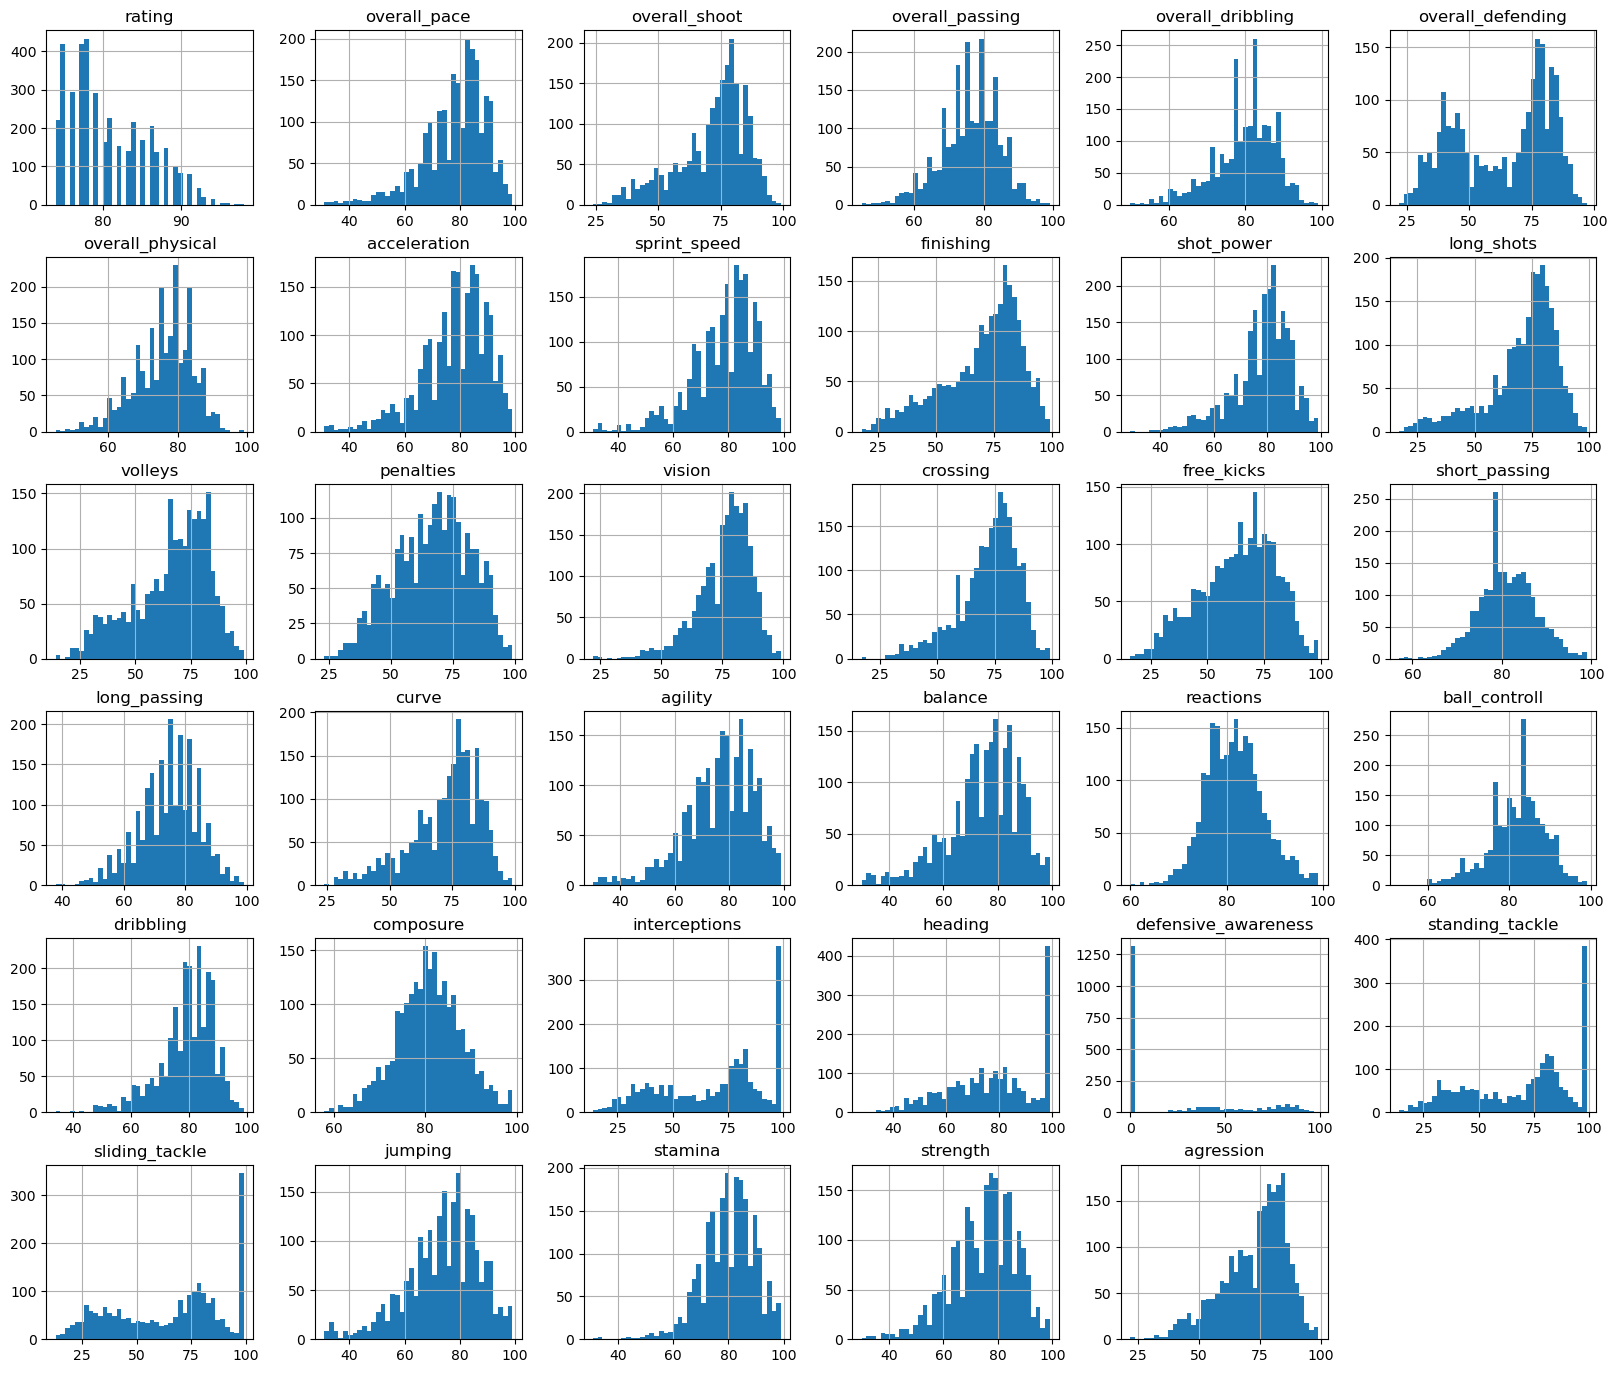

In [384]:
df2.hist(bins=40, figsize=(20,17))
plt.show()

The histograms indicate that the data values do range between 0 and 100 as intended so scalling wont be necceray in the future.
However, the "defensive_awareness" column's histogram indicates that there is an abnormaly large ammount of players with 0 in that spesific column.
After further investigation it appears to be a mistake at the site that i've scrapped data from's end, so sadly this column will also have to drop.

In [ ]:
df2.drop('defensive_awareness',axis=1,inplace=True)

Lets save a new file of the data frame after it has been cleaned.

In [361]:
df2.to_csv('fifa_23_futhead_cleaned.csv', index=False)

Next i'll use the 'corr' function to create a correlation matrix to see which columns have a high correlation between them and the 'rating' column.

<AxesSubplot:>

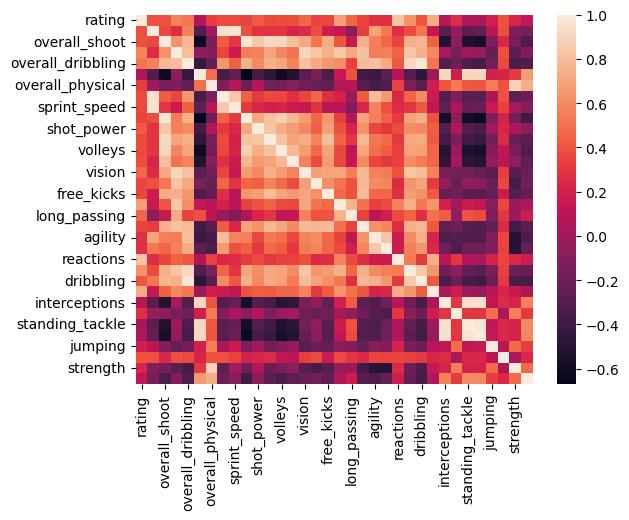

In [331]:
correlation_matrix=df2.corr()
sns.heatmap(correlation_matrix)

In [324]:
correlation_matrix['rating'].sort_values(ascending=False)

rating               1.000000
reactions            0.825024
composure            0.724189
short_passing        0.674680
ball_controll        0.624617
overall_passing      0.562956
overall_dribbling    0.519940
vision               0.464380
long_passing         0.461457
shot_power           0.424787
dribbling            0.410511
overall_shoot        0.398384
stamina              0.396155
overall_pace         0.387201
penalties            0.383333
volleys              0.373650
sprint_speed         0.373015
acceleration         0.370029
long_shots           0.363634
free_kicks           0.354833
finishing            0.352299
curve                0.350113
crossing             0.347957
overall_physical     0.323758
agility              0.280913
balance              0.266583
heading              0.259538
strength             0.227913
jumping              0.193175
agression            0.119651
interceptions        0.081532
overall_defending    0.050891
standing_tackle      0.042528
sliding_ta

If a columns value is close to 1 that means it is highly correlated to the rating. for example we can see a relatively high correlation between the 'composure' and 'reaction' columns with the 'rating' column.
Lets visualise the two with the rating column, the line plot should trend upwards as the rating goes up.

<AxesSubplot:xlabel='composure', ylabel='rating'>

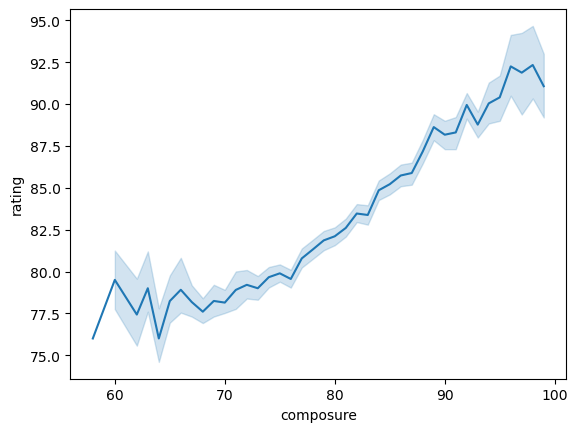

In [127]:
sns.lineplot(data=df2, x="composure", y="rating")

<AxesSubplot:xlabel='reactions', ylabel='rating'>

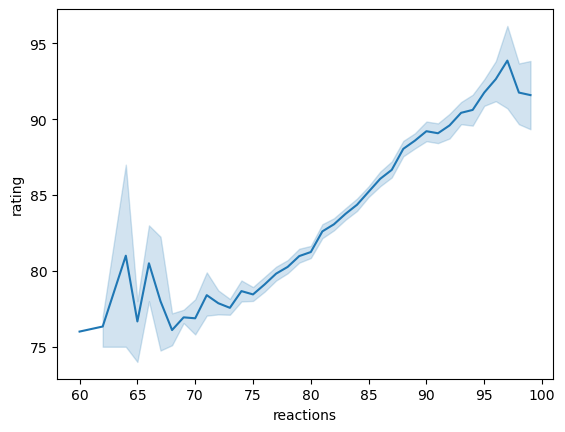

In [128]:
sns.lineplot(data=df2, x="reactions", y="rating")

Now i'll visualise a column which is not highly correlated to see the difference. the 'sliding_tackle' stat should behave speratic going up and down with no real connection to the players rating

<AxesSubplot:xlabel='sliding_tackle', ylabel='rating'>

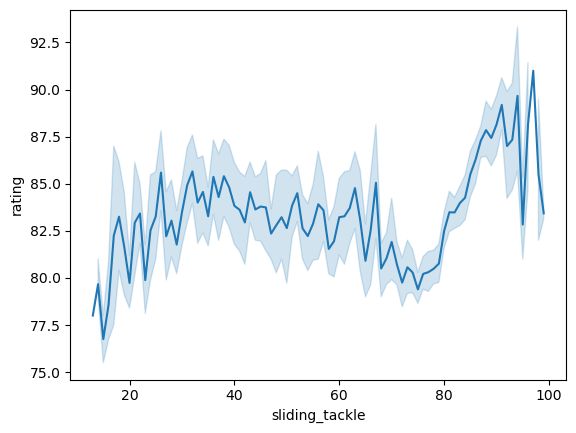

In [301]:
sns.lineplot(data=df2, x="sliding_tackle", y="rating")

# The following segment focuses on the machine learning part of the project.
## in particular the implementation, use and assesment of several different linear regression models to predict a player's final rating.
## The multiple linear regression model's calculation will be as follows : 
# rating = intercept + ∑x(i) * Individual_stat(i) for i from 0 to N 
## with x being the coeficient. i'll try to get a high enough R2 score as well as to see the error rate between the actual player rating, and the rating my model predicted.

I'll start by creating a few functions to help me along the way.

the following "my_test_train_split" function receives a data frame, and the columns we want to check against our rating column. it splits the data into 80% test and 20% train, prints out the number of samples for each case.

In [599]:
def my_test_train_split(data_frame,columns):
    X = df2[columns]
    y = df2['rating']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("Initial amount of samples: {}".format(X.shape[0]))
    print("Number of training samples: {}".format(X_train.shape[0]))
    print("Number of test samples: {}".format(X_test.shape[0]))
    
    lr_model=linear_model.LinearRegression()
    lr_model.fit(X_train,y_train)
    return lr_model,X_train,y_train,X_test,y_test

The following "calcR2" function receives a linear regression model and calculates the R2 score for the given model, a R2 score closer to 1 is better and closer to 0 is worse.
It also prints out the coeficient list for the given models columns and also the intercept.

In [628]:
def calcR2(lr_model,X_train,y_train,columns,lr_model_name):
    print("Intercept:",lr_model.intercept_)
    coeffsDF=pd.DataFrame({"Coefficient=X(i)":lr_model.coef_,"Individual_stat(i)":columns})
    coeffsDF.index.name="i"
    print(coeffsDF)
    print("\n rating =  intercept + Σ[x(i)*stat(i)] for i=0 to N")
    print("\nR2 score for "+ lr_model_name+ " linear regression model :",lr_model.score(X_train,y_train))
    return coeffsDF

The following "predictionDF" function is given a linear regression model, and predicts the test samples "rating".
It then calculates the absolute value of the error rate, which is the percent of error between the actual rating and the predicted rating.
It creates a data frame with the columns "actual rating", "predicted ratings" and "error rate" and returns said data frame.

In [629]:
def predictionDF(lr_model,X_test,y_test):
    y_pred=lr_model.predict(X_test)
    predictionDF=pd.DataFrame({"Actual_rating":y_test,"Predicted_rating":y_pred})
    predictionDF["|error_rate(%)|"]=abs(100-(100/(predictionDF["Actual_rating"]/predictionDF["Predicted_rating"])))
    return predictionDF
    

The following "printPercent" function simply calculates and prints to the screen the percent of players with an error rate above/bellow (depends on string 1) a certain threshold (string 2)

In [630]:
def printPercent(data_frame,string1,string2):
    if(string1=='under'):
        percent = str(data_frame['|error_rate(%)|'][data_frame['|error_rate(%)|'] < int(string2) ].count()/449*100)
    elif(string1=='over'):
        percent = str(data_frame['|error_rate(%)|'][data_frame['|error_rate(%)|'] > int(string2) ].count()/449*100)
    print("percent of predicted ratings with an error rate "+string1+" "+string2+" % is :  "+percent+" %")


##### the following "evalModel" function combines the past 4 function into one and allso returns the prediction data frame.

In [631]:
def evalModel(model_name,columns):
    print("Evaluation statistics for "+model_name+ " model :")
    lr,xTrain,yTrain,xTest,yTest=my_test_train_split(df2,columns)
    print("\n")
    coeff_df=calcR2(lr,xTrain,yTrain,columns,model_name)
    prediction_df=predictionDF(lr,xTest,yTest)
    print("\nNow showing 5 rows from the prediction data frame :\n")
    print(df.head())
    print("\nNow showing description of prediction data frame\n")
    print(df.describe())
    print('\n')
    printPercent(df,'under','3')
    printPercent(df,'over', '10')
    return  prediction_df

Now that i have all the functions i need in order to evaluate a certain model, i'll apply said functions on a few different models, starting with the 4 least correlated columns with the rating column.

In [632]:
cols=['sliding_tackle',"standing_tackle","overall_defending","interceptions"]
df=evalModel("bottm 4 correlated columns",cols )

Evaluation statistics for bottm 4 correlated columns model :
Initial amount of samples: 2243
Number of training samples: 1794
Number of test samples: 449


Intercept: 81.25936150050568
   Coefficient=X(i) Individual_stat(i)
i                                     
0         -0.089894     sliding_tackle
1         -0.012503    standing_tackle
2          0.011436  overall_defending
3          0.112943      interceptions

 rating =  intercept + Σ[x(i)*stat(i)] for i=0 to N

R2 score for bottm 4 correlated columns linear regression model : 0.03968454982790581

Now showing 5 rows from the prediction data frame :

      Actual_rating  Predicted_rating  |error_rate(%)|
727            85.0         79.593751         6.360293
907            84.0         85.037643         1.235290
1547           80.0         78.774608         1.531739
240            89.0         87.281596         1.930791
686            86.0         85.561671         0.509685

Now showing description of prediction data frame

      

#### As we can see, when applying the model to the 4 columns who are the least correlated with the rating column, we get awefull metrics.
#### A R2 score of 0.039 is horrible, as well as only 34% of all predicted ratings had an error rate of 3% or lower which is also very low. 

Next i'll try to apply my model on 2 highly correlated columns as well as 2 lowly correlated columns with the rating column. Lets see how it fares.

In [633]:
cols=['sliding_tackle',"standing_tackle","composure","reactions"]
df=evalModel("mixed correlated columns",cols )

Evaluation statistics for mixed correlated columns model :
Initial amount of samples: 2243
Number of training samples: 1794
Number of test samples: 449


Intercept: 29.820487422278013
   Coefficient=X(i) Individual_stat(i)
i                                     
0          0.015431     sliding_tackle
1         -0.013328    standing_tackle
2          0.167744          composure
3          0.485129          reactions

 rating =  intercept + Σ[x(i)*stat(i)] for i=0 to N

R2 score for mixed correlated columns linear regression model : 0.7143985606212625

Now showing 5 rows from the prediction data frame :

      Actual_rating  Predicted_rating  |error_rate(%)|
727            85.0         81.678611         3.907517
907            84.0         83.206890         0.944179
1547           80.0         83.195453         3.994317
240            89.0         82.832279         6.930023
686            86.0         80.274606         6.657435

Now showing description of prediction data frame

       Act

#### As we can see the R2 score has improved significantly to 0.71 which is not bad at all. As well as 73% of predicted ratings had an error rate of 3% or lower and less then 1% of predicted ratings had an error rate of over 10% which is also a big improvement over the past model.

Next i'll try my model with 4 highly correlated columns to the rating collumn, lets see how it fares:

In [634]:
cols=["composure","reactions","short_passing","ball_controll"]
df=evalModel("top 4 correlated columns",cols )

Evaluation statistics for top 4 correlated columns model :
Initial amount of samples: 2243
Number of training samples: 1794
Number of test samples: 449


Intercept: 24.171462482926437
   Coefficient=X(i) Individual_stat(i)
i                                     
0          0.066716          composure
1          0.439556          reactions
2          0.160591      short_passing
3          0.056136      ball_controll

 rating =  intercept + Σ[x(i)*stat(i)] for i=0 to N

R2 score for top 4 correlated columns linear regression model : 0.7601843491203413

Now showing 5 rows from the prediction data frame :

      Actual_rating  Predicted_rating  |error_rate(%)|
727            85.0         76.989113         9.424573
907            84.0         85.337072         1.591752
1547           80.0         74.088579         7.389276
240            89.0         87.323060         1.884202
686            86.0         86.902431         1.049339

Now showing description of prediction data frame

       Act

#### We can see there is further improvement with a R2 score of 0.76 and allmost 80% of all predicted ratings have been off by 3% or less

Finally' i'll run my model with all the columns no matter how highly or lowely they correlate with the rating column.
Lets see if it improves upon the last model or actually makes it worse:

In [636]:
cols=df2.drop(['rating','position','name'],axis=1).columns
df=evalModel("all columns",cols )

Evaluation statistics for all columns model :
Initial amount of samples: 2243
Number of training samples: 1794
Number of test samples: 449


Intercept: 16.91211056790678
    Coefficient=X(i) Individual_stat(i)
i                                      
0          -0.074318       overall_pace
1          -0.427959      overall_shoot
2           0.177893    overall_passing
3           0.418256  overall_dribbling
4           0.015336  overall_defending
5           0.265434   overall_physical
6           0.073652       acceleration
7           0.088046       sprint_speed
8           0.204255          finishing
9           0.106546         shot_power
10          0.059884         long_shots
11          0.020445            volleys
12          0.019086          penalties
13         -0.089411             vision
14         -0.030728           crossing
15          0.013425         free_kicks
16          0.119758      short_passing
17          0.009202       long_passing
18         -0.009914          

#### As seen, the R2 score have increased even more and now stands at 0.82 which is great. as well as over 82% of all predicted ratings have had an error rate of 3% or lower which is also high.

## The 4 models constructed here behaved as expected, a model built only on lowly correlated columns with the column we would want to predict was very bad.
## As the correlations between the columns chosen for the model rose, so has the effectiveness of said model.